<a href="https://colab.research.google.com/github/0LucasMatheus/0LucasMatheus/blob/main/mushroom4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports, utilidades e semente aleatória

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Define um estado aleatório para garantir a reprodutibilidade dos resultados
RANDOM_STATE = 42

# Configura a validação cruzada estratificada em 5 folds, mantendo a proporção das classes em cada fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Define uma função para plotar a matriz de confusão de um modelo
def plot_confusion_matrix(model, X_test, y_test, class_names, title):
    # Cria e plota a matriz de confusão usando a função do scikit-learn
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, display_labels=class_names
    )
    # Adiciona título e rótulos aos eixos do gráfico
    plt.title(title)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    # Exibe o gráfico
    plt.show()

# Define uma função para plotar os dados em 2D após aplicar PCA (apenas para visualização)
def scatter_pca_2d(X, y, title):
    # Aplica Análise de Componentes Principais (PCA) para reduzir a dimensionalidade para 2 componentes
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X2 = pca.fit_transform(X)
    # Cria uma nova figura para o plot
    plt.figure()
    # Plota os dados transformados em 2D, usando as classes como cores
    plt.scatter(X2[:, 0], X2[:, 1], c=y)  # sem especificar paleta de cores
    # Adiciona título e rótulos aos eixos do gráfico
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    # Exibe o gráfico
    plt.show()

import dataset

In [ ]:
# Monta o Google Drive para acessar arquivos armazenados na nuvem
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


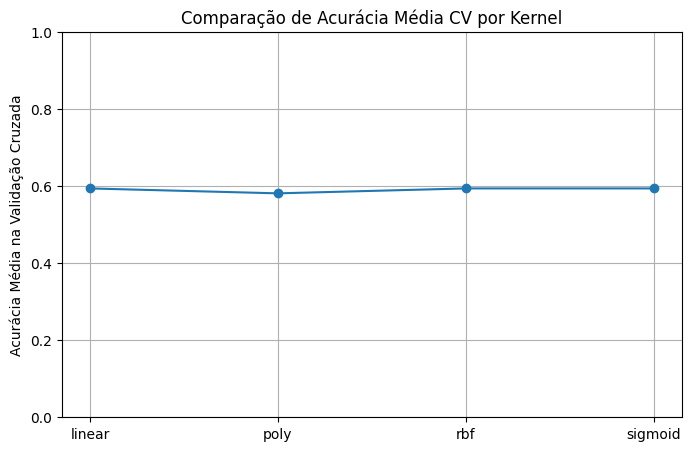

In [ ]:
# Extrai os resultados do GridSearchCV
results = grid_search.cv_results_

# Calcula a acurácia média para cada kernel
kernel_mean_scores = {}
for kernel in param_grid['svc__kernel']:
    kernel_scores_for_kernel = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['svc__kernel'] == kernel]
    if kernel_scores_for_kernel: # Verifica se a lista não está vazia
        kernel_mean_scores[kernel] = np.mean(kernel_scores_for_kernel)
    else:
        kernel_mean_scores[kernel] = 0 # Atribui 0 ou NaN se não houver resultados para o kernel

# Cria um gráfico de barras para comparar as acurácias médias dos kernels
kernels = list(kernel_mean_scores.keys())
mean_scores = list(kernel_mean_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(kernels, mean_scores, color=['blue', 'orange', 'green', 'red']) # Cores para cada barra
plt.ylim(0, 1) # Define o limite do eixo y de 0 a 1 para acurácia
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia Média CV por Kernel')
plt.show()

In [ ]:
import pandas as pd

# Carrega o arquivo CSV contendo os dados dos cogumelos em um DataFrame pandas
# O arquivo 'mushroom_s4_capcolor_ohe.csv' contém dados sobre características de cogumelos,
# onde a coluna 'class' indica se o cogumelo é comestível ('e') ou venenoso ('p').
# As outras colunas são características, como a cor do chapéu ('cap-color'),
# que foram transformadas usando One-Hot Encoding (OHE).
mushroom = pd.read_csv('/content/drive/MyDrive/mushroom_s4_capcolor_ohe.csv')

# Exibe as primeiras 5 linhas do DataFrame para verificar se os dados foram carregados corretamente
display(mushroom.head())

,cap-color__b,cap-color__c,cap-color__e,cap-color__g,cap-color__n,cap-color__p,cap-color__r,cap-color__u,cap-color__w,cap-color__y,class
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,p
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,e
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,e
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,p
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e


<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-285568327.py:55: SyntaxWarning: invalid escape sequence '\m'
  legend_labels = [f'p (Venenoso)' if label == '$\mathdefault{1.0}$' else f'e (Comestível)' for label in labels]


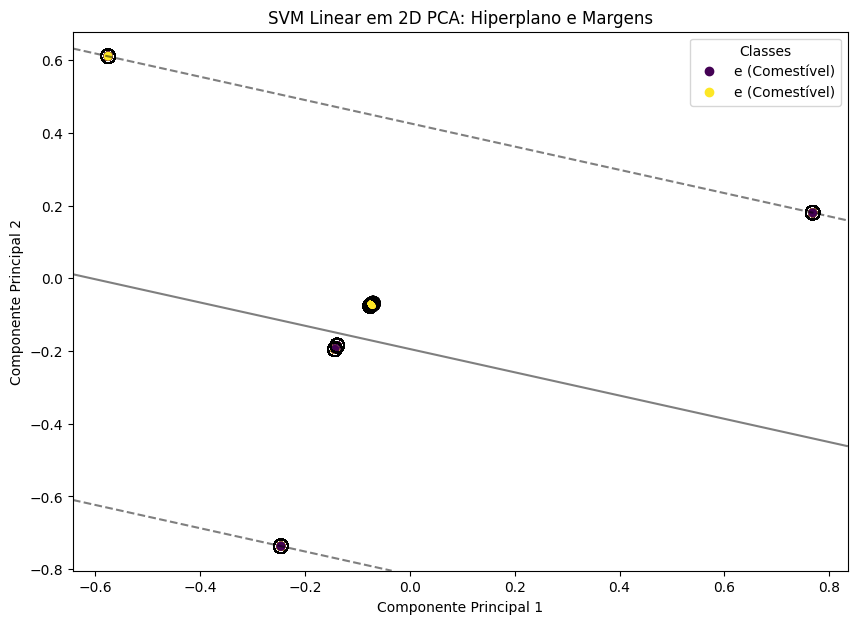

In [ ]:
# Reduzindo a dimensionalidade para 2 componentes principais para visualização
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

# Convertendo rótulos 'e' e 'p' para numérico (0 e 1) para plotagem
y_numeric = y.apply(lambda x: 1 if x == 'p' else 0)


# Dividindo os dados PCA em treino e teste (mantendo a estratificação)
# Usando y_numeric_split para garantir que a divisão estratificada use os valores numéricos corretos
# E também dividindo X_pca
X_train_pca, X_test_pca, y_train_pca_numeric, y_test_pca_numeric = train_test_split(
    X_pca, y_numeric, test_size=0.2, random_state=RANDOM_STATE, stratify=y_numeric
)

# Treinando um modelo SVM com kernel linear nos dados PCA
# Usamos os melhores parâmetros C e gamma encontrados anteriormente, mas o kernel é fixo como linear
# Note que gamma='scale' no modelo linear não tem efeito, mas mantemos C do melhor modelo
linear_svm_pca = SVC(kernel='linear', C=grid_search.best_params_['svc__C'], random_state=RANDOM_STATE)
linear_svm_pca.fit(X_train_pca, y_train_pca_numeric) # Treinando com os rótulos numéricos


# Função para plotar o hiperplano e as margens
def plot_svm_decision_boundary(model, X, y_numeric, title): # Alterado para aceitar y numérico
    plt.figure(figsize=(10, 7))
    # Plota os pontos de dados usando os rótulos numéricos para colorir
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='viridis', s=30)

    # Plota o hiperplano e as margens
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Cria o grid para avaliar o modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plota o hiperplano e as margens paralelas
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plota os vetores de suporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")

    # Ajusta a legenda para mostrar os rótulos originais ('e' e 'p') corrigindo o FutureWarning
    handles, labels = scatter.legend_elements()
    legend_labels = [f'p (Venenoso)' if label == '$\mathdefault{1.0}$' else f'e (Comestível)' for label in labels]
    plt.legend(handles, legend_labels, title="Classes")

    plt.show()


# Plota o hiperplano e as margens para o modelo linear treinado nos dados PCA
# Passa os rótulos numéricos para a função de plotagem
plot_svm_decision_boundary(linear_svm_pca, X_test_pca, y_test_pca_numeric, "SVM Linear em 2D PCA: Hiperplano e Margens")

In [ ]:
# Prepara os dados para o treinamento do modelo.
# Separa as features (variáveis independentes) e o target (variável dependente).

# 'X' contém todas as colunas do DataFrame 'mushroom', exceto a coluna 'class'.
# Estas colunas representam as características dos cogumelos usadas para prever a classe.
X = mushroom.drop('class', axis=1)

# 'y' contém apenas a coluna 'class', que é o target que o modelo tentará prever.
# Os valores nesta coluna são 'e' (comestível) ou 'p' (venenoso).
y = mushroom['class']

# Obtém os rótulos únicos das classes presentes no target 'y'.
# Neste caso, os rótulos serão ['p', 'e'].
labels = y.unique()

In [ ]:
# Divide o dataset em conjuntos de treino e teste para avaliar o desempenho do modelo.
# test_size=0.2 significa que 20% dos dados serão usados para teste e 80% para treino.
# random_state=RANDOM_STATE garante que a divisão seja a mesma a cada execução para reprodutibilidade.
# stratify=y garante que a proporção das classes seja mantida tanto no conjunto de treino quanto no de teste,
# o que é importante para datasets com classes desbalanceadas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Imprime as dimensões (shape) dos conjuntos resultantes para verificar se a divisão ocorreu como esperado.
print("Shape de X_train:", X_train.shape) # Número de amostras de treino e número de features
print("Shape de X_test:", X_test.shape)   # Número de amostras de teste e número de features
print("Shape de y_train:", y_train.shape) # Número de rótulos de treino
print("Shape de y_test:", y_test.shape)     # Número de rótulos de teste

Shape de X_train: (6499, 10)
Shape de X_test: (1625, 10)
Shape de y_train: (6499,)
Shape de y_test: (1625,)


# GridSearchCV completo (kernel + C + gamma)

## Visualizações de Dados

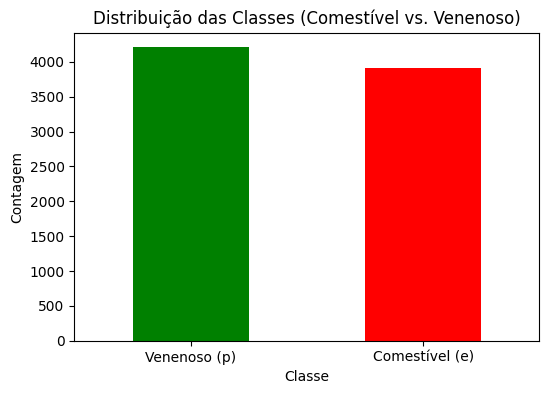

In [ ]:
# Visualização da distribuição das classes (comestível vs. venenoso)
plt.figure(figsize=(6, 4))
mushroom['class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição das Classes (Comestível vs. Venenoso)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Venenoso (p)', 'Comestível (e)'], rotation=0)
plt.show()

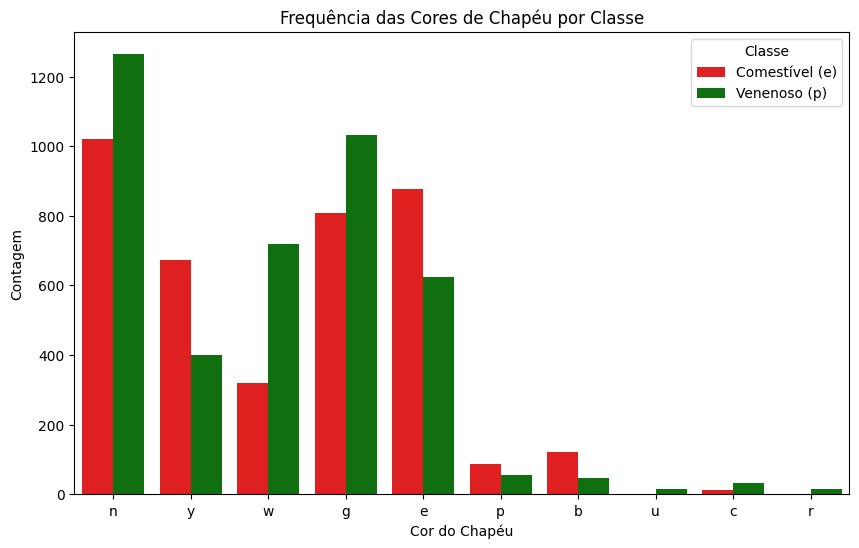

In [ ]:
# Visualização da frequência das cores de chapéu para cada classe
# Primeiro, vamos desfazer o OHE para a coluna 'cap-color' para facilitar a visualização
cap_color_cols = [col for col in mushroom.columns if col.startswith('cap-color__')]
mushroom['cap-color'] = mushroom[cap_color_cols].idxmax(axis=1).apply(lambda x: x.split('__')[1])

plt.figure(figsize=(10, 6))
# Cria um gráfico de contagem das cores de chapéu, separando por classe
import seaborn as sns
sns.countplot(data=mushroom, x='cap-color', hue='class', palette={'e': 'green', 'p': 'red'})
plt.title('Frequência das Cores de Chapéu por Classe')
plt.xlabel('Cor do Chapéu')
plt.ylabel('Contagem')
plt.legend(title='Classe', labels=['Comestível (e)', 'Venenoso (p)'])
plt.show()

# Remove a coluna temporária 'cap-color'
mushroom = mushroom.drop('cap-color', axis=1)

## Interpretação da Matriz de Confusão

A matriz de confusão é uma ferramenta essencial para avaliar o desempenho de um modelo de classificação. Ela compara as classes reais com as classes preditas pelo modelo.

Na matriz de confusão do seu modelo SVM, observamos os seguintes valores:

- **Verdadeiros Positivos (True Positives - TP):** O modelo previu corretamente a classe positiva. No seu caso, seriam os cogumelos venenosos ('p') que o modelo previu como venenosos.
- **Verdadeiros Negativos (True Negatives - TN):** O modelo previu corretamente a classe negativa. Seriam os cogumelos comestíveis ('e') que o modelo previu como comestíveis.
- **Falsos Positivos (False Positives - FP):** O modelo previu a classe positiva, mas a classe real era negativa. Seriam os cogumelos comestíveis ('e') que o modelo previu erroneamente como venenosos ('p'). **Este é um erro crítico neste contexto, pois classificar um cogumelo comestível como venenoso é menos perigoso do que o contrário.**
- **Falsos Negativos (False Negatives - FN):** O modelo previu a classe negativa, mas a classe real era positiva. Seriam os cogumelos venenosos ('p') que o modelo previu erroneamente como comestíveis ('e'). **Este é o erro mais perigoso neste contexto, pois classificar um cogumelo venenoso como comestível pode ter sérias consequências.**

Analisando os números na sua matriz, você pode ver a quantidade de cada um desses casos. Por exemplo, o número de Falsos Negativos (cogumelos venenosos classificados como comestíveis) indica quantos cogumelos perigosos seu modelo "deixou passar".

Para aprimorar seu modelo, você pode focar em reduzir os Falsos Negativos, mesmo que isso signifique aumentar um pouco os Falsos Positivos. Dependendo da aplicação, diferentes métricas (como Precisão, Recall, F1-Score) podem ser mais relevantes do que apenas a acurácia.

Melhores parâmetros: linear
Melhor acurácia (cross-validation): 0.5944019660093564
[mushroom] Melhor modelo (GridSearchCV) — Acurácia no teste: 59.88%


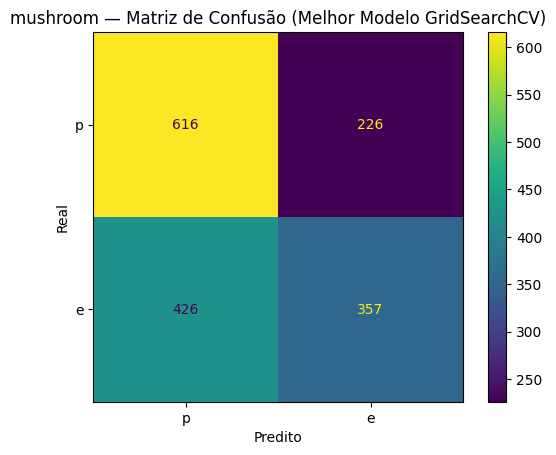

In [ ]:
# Este bloco de código realiza uma busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros
# para um modelo SVM (Support Vector Machine) com diferentes kernels.

# Configura uma Pipeline que primeiro aplica Standard Scaling (normalização) aos dados
# e depois treina um modelo SVC (SVM Classifier).
# O StandardScaler é importante para SVMs, pois eles são sensíveis à escala das features.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Primeiro passo: Normaliza as features
    ('svc', SVC(random_state=RANDOM_STATE)) # Segundo passo: Treina o modelo SVM
])

# Define a grade de parâmetros a serem testados para o modelo SVC.
# 'svc__kernel': Os diferentes tipos de kernel a serem experimentados (linear, polinomial, rbf, sigmoid).
# 'svc__C': O parâmetro de regularização C, que controla a margem de decisão. Valores menores significam maior regularização.
# 'svc__gamma': O coeficiente do kernel para 'rbf', 'poly' e 'sigmoid'. 'scale' usa 1 / (n_features * X.var()).
param_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 0.01, 0.1, 1]
}

# Configura o GridSearchCV.
# pipeline: O modelo (neste caso, a pipeline) a ser otimizado.
# param_grid: A grade de parâmetros a serem testados.
# cv=cv: Utiliza a validação cruzada estratificada definida anteriormente (5 folds).
# scoring='accuracy': A métrica a ser usada para avaliar a performance do modelo em cada combinação de parâmetros.
# n_jobs=-1: Utiliza todos os núcleos disponíveis do processador para acelerar o processo.
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Executa o GridSearchCV nos dados de treino (X_train, y_train).
# O GridSearchCV irá treinar e avaliar o modelo para cada combinação de parâmetros na grade,
# usando validação cruzada.
grid_search.fit(X_train, y_train)

# Exibe os melhores parâmetros encontrados pelo GridSearchCV.
print("Melhores parâmetros:", grid_search.best_params_["svc__kernel"])
# Exibe a melhor pontuação de acurácia obtida durante a validação cruzada com os melhores parâmetros.
print("Melhor acurácia (cross-validation):", grid_search.best_score_)

# Obtém o melhor modelo treinado pelo GridSearchCV (o modelo com os melhores parâmetros).
best_model = grid_search.best_estimator_
# Faz previsões no conjunto de teste usando o melhor modelo.
y_pred = best_model.predict(X_test)
# Calcula a acurácia do melhor modelo no conjunto de teste.
acc = accuracy_score(y_test, y_pred)
# Imprime a acurácia do melhor modelo no conjunto de teste.
print(f"[mushroom] Melhor modelo (GridSearchCV) — Acurácia no teste: {acc*100:.2f}%")

# Plota a matriz de confusão para o melhor modelo no conjunto de teste.
# Isso ajuda a visualizar o desempenho do classificador, mostrando o número de
# verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
plot_confusion_matrix(best_model, X_test, y_test, labels, "mushroom — Matriz de Confusão (Melhor Modelo GridSearchCV)")

,cap-color__b,cap-color__c,cap-color__e,cap-color__g,cap-color__n,cap-color__p,cap-color__r,cap-color__u,cap-color__w,cap-color__y,class
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,p
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,e
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,e
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,p
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e


Melhores parâmetros: sigmoid
Melhor acurácia (cross-validation): 0.5944019660093564
[mushroom] Melhor modelo (RandomizedSearchCV) — Acurácia no teste: 59.88%


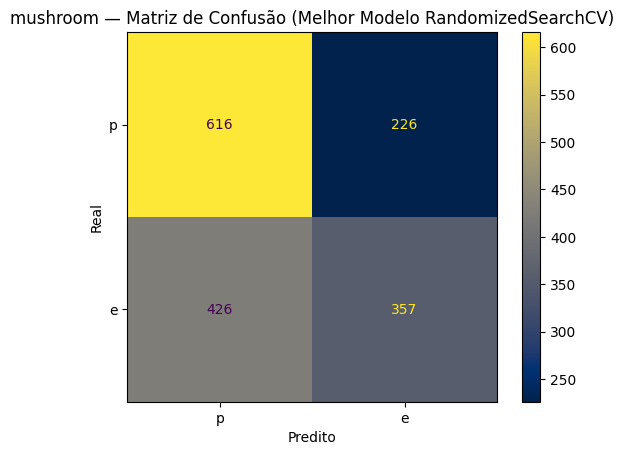

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

RANDOM_STATE = 42

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


param_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 0.01, 0.1, 1]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Primeiro passo: Normaliza as features
    ('svc', SVC(random_state=RANDOM_STATE)) # Segundo passo: Treina o modelo SVM
])

from google.colab import drive
# drive.mount('/content/drive') # Comentado conforme discussão anterior

# mushroom = pd.read_csv('/content/drive/MyDrive/mushroom_s4_capcolor_ohe.csv') # Comentado conforme discussão anterior
import pandas as pd
mushroom = pd.read_csv('/content/mushroom_s4_capcolor_ohe.csv') # Carregando do caminho local

display(mushroom.head())

X = mushroom.drop('class', axis=1)

# 'y' contém apenas a coluna 'class', que é o target que o modelo tentará prever.
# Os valores nesta coluna são 'e' (comestível) ou 'p' (venenoso).
y = mushroom['class']

# Obtém os rótulos únicos das classes presentes no target 'y'.
# Neste caso, os rótulos serão ['p', 'e'].
labels = y.unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

random_search = RandomizedSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

print("Melhores parâmetros:", random_search.best_params_["svc__kernel"])
# Exibe a melhor pontuação de acurácia obtida durante a validação cruzada com os melhores parâmetros.
print("Melhor acurácia (cross-validation):", random_search.best_score_)

# Obtém o melhor modelo treinado pelo GridSearchCV (o modelo com os melhores parâmetros).
best_model = random_search.best_estimator_
# Faz previsões no conjunto de teste usando o melhor modelo.
y_pred = best_model.predict(X_test)
# Calcula a acurácia do melhor modelo no conjunto de teste.
acc = accuracy_score(y_test, y_pred)
# Imprime a acurácia do melhor modelo no conjunto de teste.
print(f"[mushroom] Melhor modelo (RandomizedSearchCV) — Acurácia no teste: {acc*100:.2f}%") # Corrigido para RandomizedSearchCV

# Plota a matriz de confusão para o melhor modelo no conjunto de teste.
# Isso ajuda a visualizar o desempenho do classificador, mostrando o número de
# verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
disp = ConfusionMatrixDisplay.from_estimator( # Captura o objeto retornado
    best_model, X_test, y_test, display_labels=labels
)
disp.im_.set_cmap('cividis') # <--- Adicionado: Muda o colormap
# Adiciona título e rótulos aos eixos do gráfico
plt.title("mushroom — Matriz de Confusão (Melhor Modelo RandomizedSearchCV)") # Corrigido para RandomizedSearchCV
plt.xlabel("Predito")
plt.ylabel("Real")
# Exibe o gráfico
plt.show()

In [ ]:
# Extrai os resultados do GridSearchCV
results = grid_search.cv_results_

# Calcula a acurácia média para cada kernel
kernel_mean_scores = {}
for kernel in param_grid['svc__kernel']:
    kernel_scores_for_kernel = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['svc__kernel'] == kernel]
    if kernel_scores_for_kernel: # Verifica se a lista não está vazia
        kernel_mean_scores[kernel] = np.mean(kernel_scores_for_kernel)
    else:
        kernel_mean_scores[kernel] = 0 # Atribui 0 ou NaN se não houver resultados para o kernel

# Cria um gráfico de barras horizontal para comparar as acurácias médias dos kernels
kernels = list(kernel_mean_scores.keys())
mean_scores = list(kernel_mean_scores.values())

plt.figure(figsize=(8, 5))
plt.barh(kernels, mean_scores, color=['dark-blue', 'orange', 'dark-green', 'purple']) # Usa plt.barh para barras horizontais
plt.xlim(0, 1) # Define o limite do eixo x de 0 a 1 para acurácia
plt.xlabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia Média CV por Kernel')
plt.show()

NameError: name 'grid_search' is not defined